<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2024/blob/main/demos/day02demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMML Day 2 Demo: pandas and matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
np.__version__

'1.23.5'

### Make sure to upload csv file to your colab folder

In [ ]:
baby = pd.read_csv('babynames.csv')

In [ ]:
display(baby)

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


### rows, columns

In [ ]:
baby.shape

(2052781, 4)

In [ ]:
baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052781 entries, 0 to 2052780
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Sex     object
 2   Count   int64 
 3   Year    int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ MB


In [ ]:
baby.tail(10)

,Name,Sex,Count,Year
2052771,Zhion,M,5,2021
2052772,Zierre,M,5,2021
2052773,Zinedine,M,5,2021
2052774,Zuhayr,M,5,2021
2052775,Zvi,M,5,2021
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021
2052780,Zyn,M,5,2021


In [ ]:
baby.describe(include='all')

,Name,Sex,Count,Year
count,2052781,2052781,2.052781e+06,2.052781e+06
unique,101338,2,NaN,NaN
top,James,F,NaN,NaN
freq,284,1209866,NaN,NaN
mean,NaN,NaN,1.762917e+02,1.977629e+03
std,NaN,NaN,1.492565e+03,3.467086e+01
min,NaN,NaN,5.000000e+00,1.880000e+03
25%,NaN,NaN,7.000000e+00,1.954000e+03
50%,NaN,NaN,1.200000e+01,1.988000e+03
75%,NaN,NaN,3.200000e+01,2.006000e+03


In [ ]:
baby.loc[:10, 'Year']

0     1880
1     1880
2     1880
3     1880
4     1880
5     1880
6     1880
7     1880
8     1880
9     1880
10    1880
Name: Year, dtype: int64

### Find the last 10 names in the data

In [ ]:
# V1
baby['Name'].tail(10)

2052771       Zhion
2052772      Zierre
2052773    Zinedine
2052774      Zuhayr
2052775         Zvi
2052776      Zyeire
2052777        Zyel
2052778       Zyian
2052779       Zylar
2052780         Zyn
Name: Name, dtype: object

In [ ]:
# V2
baby.tail(10).loc[0:, 'Name']

0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
2052776       Zyeire
2052777         Zyel
2052778        Zyian
2052779        Zylar
2052780          Zyn
Name: Name, Length: 2052781, dtype: object

In [ ]:
# V3
baby.iloc[-10:, 0]

2052771       Zhion
2052772      Zierre
2052773    Zinedine
2052774      Zuhayr
2052775         Zvi
2052776      Zyeire
2052777        Zyel
2052778       Zyian
2052779       Zylar
2052780         Zyn
Name: Name, dtype: object

In [ ]:
baby['Year'].max()

2021

In [ ]:
print(f"The min is {baby['Year'].min()}; the max is {baby['Year'].max()}.")


The min is 1880; the max is 2021.


### Masks


In [ ]:
baby[baby['Year'] > 2000]

,Name,Sex,Count,Year
1362784,Emily,F,25058,2001
1362785,Madison,F,22166,2001
1362786,Hannah,F,20719,2001
1362787,Ashley,F,16529,2001
1362788,Alexis,F,16402,2001
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


In [ ]:
mask = baby['Year'] == 1990
mask.sum()

24717

In [ ]:
# How could we get the 6 most popular names in 2021?
# Hint: we can sort a DataFrame with .sort_values()
mask = baby['Year'] == 2021
baby.loc[mask, ['Name', 'Count']].sort_values(by='Count', ascending=False).head(6)


,Name,Count
2038788,Liam,20272
2038789,Noah,18739
2021244,Olivia,17728
2021245,Emma,15433
2038790,Oliver,14616
2021246,Charlotte,13285


In [ ]:
mask = (baby.Name == 'Siri') & (baby.Sex == 'F')
years = baby.loc[mask, 'Year']
counts = baby.loc[mask, 'Count']
counts

388932      6
407696      6
426971      5
435780      7
454830     12
           ..
1899118    20
1931718    20
1966241    13
1999927    10
2032200     9
Name: Count, Length: 77, dtype: int64

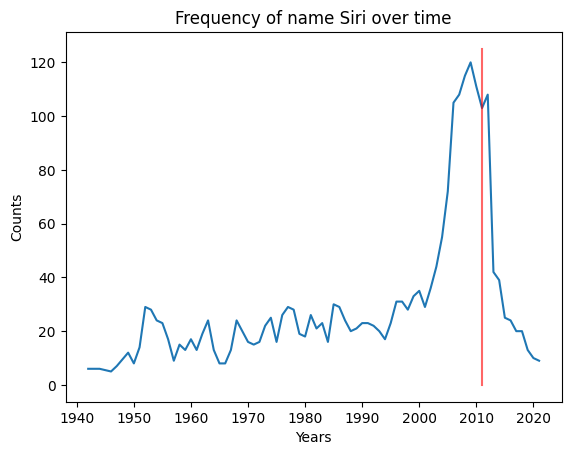

In [ ]:
plt.plot(years, counts)

# Siri released in 2011
plt.plot([2011, 2011], [0, 125], color='red', alpha=0.6)

plt.xlabel('Years')
plt.ylabel('Counts')
plt.title('Frequency of name Siri over time')
plt.show()

Text(0.5, 1.0, 'Scott over the years')

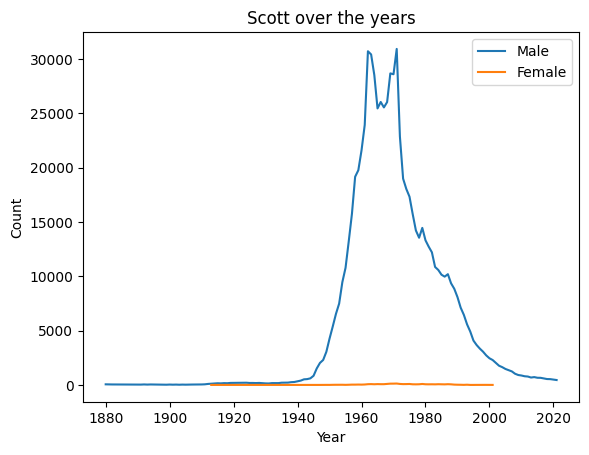

In [ ]:
# try making the plot for your name
# if you had to guess your age based on the plot,
# what would you guess?
name = 'Scott'
mask = (baby['Name'] == name) & (baby['Sex'] == 'M')
data = baby.loc[mask, ['Count', 'Year']]
plt.plot(data['Year'], data['Count'], label='Male')

mask = (baby['Name'] == name) & (baby['Sex'] == 'F')
data = baby.loc[mask, ['Count', 'Year']]
plt.plot(data['Year'], data['Count'], label='Female')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Scott over the years')